In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Assume base_model is already defined (like MobileNet, VGG16, etc.)
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Flatten the output of the base model
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(6, activation='softmax')  # Multi-class classification (6 classes)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,558 (56.64 MB)

 Trainable params: 132,870 (519.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'Colab Notebooks'  'Final Model FYP'


In [ ]:
!ls "/content/drive/MyDrive/Final Model FYP/model"


Pepper__bell___Bacterial_spot  Potato___healthy  Tomato_Spider_mites_Two_spotted_spider_mite
Pepper__bell___healthy	       test		 train
Potato___Early_blight	       Tomato_healthy


In [ ]:
!ls "/content/drive/MyDrive/Final Model FYP/model/train"


In [ ]:
import os

dataset_path = "/content/drive/My Drive/Final Model FYP/model"

# Iterate through each subdirectory (SEV folder)
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)

    if os.path.isdir(subdir_path):  # Ensure it's a directory
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{subdir}' contains {image_count} images.")


Folder 'Tomato_healthy' contains 1591 images.
Folder 'Pepper__bell___healthy' contains 1478 images.
Folder 'Potato___healthy' contains 152 images.
Folder 'Potato___Early_blight' contains 1000 images.
Folder 'Pepper__bell___Bacterial_spot' contains 996 images.
Folder 'Tomato_Spider_mites_Two_spotted_spider_mite' contains 1676 images.


In [ ]:
import os
import cv2
import albumentations as A
import numpy as np
from PIL import Image  # Using PIL for saving images

# Paths
input_folder = "/content/drive/My Drive/Final Model FYP/model/Potato___healthy"

# Check initial file count before augmentation
original_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print(f"Found {len(original_files)} original images in '{input_folder}' before augmentation.")

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
    A.Resize(224, 224)  # Resizing all images to 224x224
])

num_augmented_images = 6  # Number of augmented images per original image

# Load images and apply augmentation
for img_file in original_files:
    img_path = os.path.join(input_folder, img_file)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(num_augmented_images):
        augmented = augmentations(image=image)['image']  # Albumentations returns NumPy array
        augmented_image = Image.fromarray(augmented)  # Convert to PIL format
        save_path = os.path.join(input_folder, f"{img_file.split('.')[0]}_aug_{i}.jpg")

        augmented_image.save(save_path)  # Save using PIL
        print(f"Saved: {save_path}")

# Check final file count
final_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print(f"Total files after augmentation: {len(final_files)}")


Found 152 original images in '/content/drive/My Drive/Final Model FYP/model/Potato___healthy' before augmentation.


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_0.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_1.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_2.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_3.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_4.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945_aug_5.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/71c06efe-089f-49b3-beed-095bd7640e32___RS_HL 1947_aug_0.jpg
Saved: /content/drive/My Drive/Final Model FYP/model/Potato___healthy/71c06efe-089f-49b3-b

In [ ]:
import os

dataset_path = "/content/drive/My Drive/Final Model FYP/model"

# Iterate through each subdirectory (SEV folder)
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)

    if os.path.isdir(subdir_path):  # Ensure it's a directory
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{subdir}' contains {image_count} images.")


Folder 'Tomato_healthy' contains 1591 images.
Folder 'Pepper__bell___healthy' contains 1478 images.
Folder 'Potato___healthy' contains 1064 images.
Folder 'Potato___Early_blight' contains 1000 images.
Folder 'Pepper__bell___Bacterial_spot' contains 996 images.
Folder 'Tomato_Spider_mites_Two_spotted_spider_mite' contains 1676 images.


In [ ]:
import os

# Path to the folder containing images
input_folder = "/content/drive/My Drive/Final Model FYP/model/Potato___healthy"

# List all files in the folder that are augmented (contain "_aug_")
augmented_images = [f for f in os.listdir(input_folder) if "_aug_" in f]

# Sort files to ensure consistency in deletion (optional)
augmented_images.sort()

# Delete only the first 64 augmented images
deleted_count = 0
for img_file in augmented_images[:64]:  # Select first 64 images
    img_path = os.path.join(input_folder, img_file)
    os.remove(img_path)  # Delete file
    deleted_count += 1

print(f"Deleted {deleted_count} augmented images.")


Deleted 64 augmented images.


In [ ]:
import os
import cv2
import albumentations as A
import numpy as np

# Define dataset paths
dataset_path = "/content/drive/My Drive/Final Model FYP/model"

# Target folders for augmentation
augmentation_targets = {
    "Pepper__bell___Bacterial_spot": 1478,
    "Tomato_Spider_mites_Two_spotted_spider_mite": 1591
}

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
    A.Resize(224, 224)
])

for folder_name, target_size in augmentation_targets.items():
    folder_path = os.path.join(dataset_path, folder_name)

    # Get existing images
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'png', 'jpeg'))]
    current_size = len(image_files)

    # Skip if the folder is empty
    if current_size == 0:
        print(f"⚠️ No images found in {folder_name}. Skipping augmentation.")
        continue

    images_to_add = target_size - current_size

    if images_to_add > 0:
        print(f"Augmenting {images_to_add} images for {folder_name}...")

        for i in range(images_to_add):
            img_file = image_files[i % current_size]  # Cycle through available images
            img_path = os.path.join(folder_path, img_file)

            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            augmented = augmentations(image=image)['image']
            save_path = os.path.join(folder_path, f"aug_{i}_{img_file}")
            cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

        print(f"✅ Completed augmentation for {folder_name}. New total: {target_size}")

print("✅ Augmentation process finished successfully!")


Augmenting 482 images for Pepper__bell___Bacterial_spot...
✅ Completed augmentation for Pepper__bell___Bacterial_spot. New total: 1478
✅ Augmentation process finished successfully!


In [ ]:
import os

dataset_path = "/content/drive/My Drive/Final Model FYP/model"

# Iterate through each subdirectory (SEV folder)
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)

    if os.path.isdir(subdir_path):  # Ensure it's a directory
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{subdir}' contains {image_count} images.")


Folder 'Tomato_healthy' contains 1591 images.
Folder 'Pepper__bell___healthy' contains 1478 images.
Folder 'Potato___healthy' contains 1000 images.
Folder 'Potato___Early_blight' contains 1000 images.
Folder 'Pepper__bell___Bacterial_spot' contains 1478 images.
Folder 'Tomato_Spider_mites_Two_spotted_spider_mite' contains 1676 images.


In [ ]:
import os

folder_path = "/content/drive/My Drive/Final Model FYP/model/Tomato_Spider_mites_Two_spotted_spider_mite"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
deleted_count = 0

for img_file in image_files[:85]:
    img_path = os.path.join(folder_path, img_file)
    os.remove(img_path)
    deleted_count += 1

print(f"Deleted {deleted_count} images from {folder_path}.")


Deleted 85 images from /content/drive/My Drive/Final Model FYP/model/Tomato_Spider_mites_Two_spotted_spider_mite.


In [ ]:
import os

dataset_path = "/content/drive/My Drive/Final Model FYP/model"

# Iterate through each subdirectory (SEV folder)
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)

    if os.path.isdir(subdir_path):  # Ensure it's a directory
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        print(f"Folder '{subdir}' contains {image_count} images.")


Folder 'Tomato_healthy' contains 1591 images.
Folder 'Pepper__bell___healthy' contains 1478 images.
Folder 'Potato___healthy' contains 1000 images.
Folder 'Potato___Early_blight' contains 1000 images.
Folder 'Pepper__bell___Bacterial_spot' contains 1478 images.
Folder 'Tomato_Spider_mites_Two_spotted_spider_mite' contains 1591 images.


In [ ]:
import os
import shutil
import random

# Define paths
base_dir = "/content/drive/MyDrive/Final Model FYP/model"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Ensure train and test directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set train-test split ratio
split_ratio = 0.8  # 80% train, 20% test

# Iterate over class folders
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    if os.path.isdir(class_path) and class_name not in ["train", "test"]:
        # Create class subdirectories in train and test
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Get all image files
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random.shuffle(images)  # Shuffle for randomness

        # Split into train and test
        split_index = int(len(images) * split_ratio)
        train_images = images[:split_index]
        test_images = images[split_index:]

        # Move images to respective folders
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))
        for img in test_images:
            shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

        print(f"✅ Moved {len(train_images)} images to train/{class_name}")
        print(f"✅ Moved {len(test_images)} images to test/{class_name}")

print("✅ Dataset successfully split into train and test!")


✅ Moved 1272 images to train/Tomato_healthy
✅ Moved 319 images to test/Tomato_healthy
✅ Moved 1182 images to train/Pepper__bell___healthy
✅ Moved 296 images to test/Pepper__bell___healthy
✅ Moved 800 images to train/Potato___healthy
✅ Moved 200 images to test/Potato___healthy
✅ Moved 800 images to train/Potato___Early_blight
✅ Moved 200 images to test/Potato___Early_blight
✅ Moved 1182 images to train/Pepper__bell___Bacterial_spot
✅ Moved 296 images to test/Pepper__bell___Bacterial_spot
✅ Moved 1272 images to train/Tomato_Spider_mites_Two_spotted_spider_mite
✅ Moved 319 images to test/Tomato_Spider_mites_Two_spotted_spider_mite
✅ Dataset successfully split into train and test!


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Verify the dataset path
!ls '/content/drive/MyDrive/Final Model FYP/model'

# Step 3: Define paths
train_dir = '/content/drive/MyDrive/Final Model FYP/model/train'
validation_dir = '/content/drive/MyDrive/Final Model FYP/model/test'

# Step 4: Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Changed to categorical for 6 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Changed to categorical for 6 classes
)

# Step 5: Load Pre-trained Model (MobileNetV2)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Step 6: Add Custom Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Changed output to 6 classes
])

# Step 7: Compile the Model
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Changed loss function for multi-class
    metrics=['accuracy']
)

# Step 8: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Step 9: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Step 10: Save the Model
model.save('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pepper__bell___Bacterial_spot  Potato___healthy  Tomato_Spider_mites_Two_spotted_spider_mite
Pepper__bell___healthy	       test		 train
Potato___Early_blight	       Tomato_healthy
Found 6508 images belonging to 6 classes.
Found 1630 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 4204s 21s/step - accuracy: 0.4070 - loss: 1.5511 - val_accuracy: 0.8881 - val_loss: 0.4899
Epoch 2/10
  1/203 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7812 - loss: 0.6769

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.7812 - loss: 0.6769 - val_accuracy: 0.8888 - val_loss: 0.4882
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 106s 513ms/step - accuracy: 0.8332 - loss: 0.5142 - val_accuracy: 0.9294 - val_loss: 0.2821
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9688 - loss: 0.2300 - val_accuracy: 0.9306 - val_loss: 0.2775
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 142s 547ms/step - accuracy: 0.8754 - loss: 0.3712 - val_accuracy: 0.9312 - val_loss: 0.2265
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.9062 - loss: 0.3203 - val_accuracy: 0.9306 - val_loss: 0.2259
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 125s 516ms/step - accuracy: 0.9125 - loss: 0.2718 - val_accuracy: 0.9500 - val_loss: 0.1731
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9375 - loss: 0.2859 - val_accuracy: 0.9500 - val_loss: 0.1699
Epoch 9/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 103s 508ms/step - accuracy: 0.9245 - loss: 0.2352 - val_

Validation Loss: 0.14335404336452484
Validation Accuracy: 0.9613496661186218


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224)) # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Pepper__bell___Bacterial_spot
Confidence: 0.96


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/downloadpotato.jpeg"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Potato___healthy
Confidence: 0.98


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/rrtyui.JPG"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224)) # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Tomato_healthy
Confidence: 0.98


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/images.jpeg"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Pepper__bell___healthy
Confidence: 0.71


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/down.jpeg"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Potato___Early_blight
Confidence: 0.98


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')  # Update with your actual model path

# Define class labels (Update based on your dataset folder names)
class_labels = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_healthy"
]

# Load an image for prediction (Updated with the given image path)
img_path = "/content/drive/MyDrive/yimage.png"  # Update with your actual path

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
confidence = np.max(predictions)  # Get confidence score

# Print result
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Tomato_Spider_mites_Two_spotted_spider_mite
Confidence: 0.64


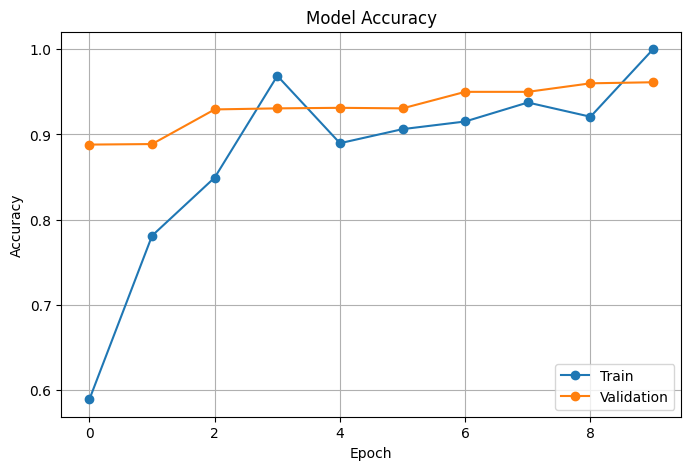

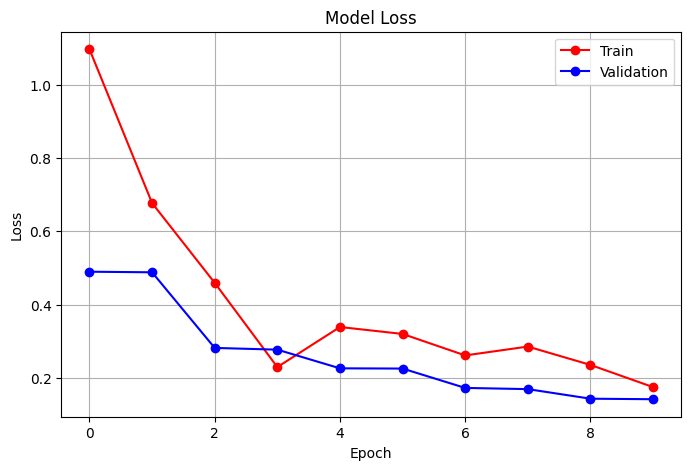

In [ ]:
import matplotlib.pyplot as plt

# Check if 'accuracy' exists in history, else use 'categorical_accuracy'
if 'accuracy' in history.history:
    acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
else:
    acc_key = 'categorical_accuracy'
    val_acc_key = 'val_categorical_accuracy'

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history[acc_key], marker='o')
plt.plot(history.history[val_acc_key], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], marker='o', color='red')
plt.plot(history.history['val_loss'], marker='o', color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Final Model FYP/model"


Pepper__bell___Bacterial_spot  test
Pepper__bell___healthy	       Tomato_healthy
Potato___Early_blight	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___healthy	       train


In [3]:
!ls "/content/drive/MyDrive/Final Model FYP"


model  multi_class_model.h5


In [6]:
print(type(model))  # This should print <class 'torch.nn.modules.container.Sequential'>


<class 'keras.src.models.sequential.Sequential'>


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for your test data
test_dir = "/content/drive/MyDrive/Final Model FYP/model/test"

# Create an ImageDataGenerator instance
test_datagen = ImageDataGenerator(rescale=1./255)  # rescale pixel values

# Use flow_from_directory to load images and labels from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust the target size as per your model input
    batch_size=32,  # You can adjust the batch size
    class_mode='categorical',  # Use 'binary' for binary classification, 'categorical' for multi-class
)

# Now evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 1630 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 941s 18s/step - accuracy: 0.9630 - loss: 0.1397
Test Loss: 0.14335404336452484
Test Accuracy: 0.9613496661186218


In [10]:
model.compile(optimizer='adam',  # or any other optimizer
              loss='categorical_crossentropy',  # use appropriate loss
              metrics=['accuracy'])  # any metrics you want to track


In [17]:
# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')

# Compile (only if needed)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate on dummy data to trigger metric initialization
import numpy as np
dummy_input = np.ones((1, 224, 224, 3), dtype=np.float32)
dummy_label = np.zeros((1, 6), dtype=np.float32)
dummy_label[0, 0] = 1  # one-hot encoded dummy label

model.evaluate(dummy_input, dummy_label, verbose=0)

# Print to verify metrics are initialized
print("Metrics after evaluation:", model.metrics_names)


Metrics after evaluation: ['loss', 'compile_metrics']


Found 1630 images belonging to 6 classes.
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step


<Figure size 1000x800 with 0 Axes>

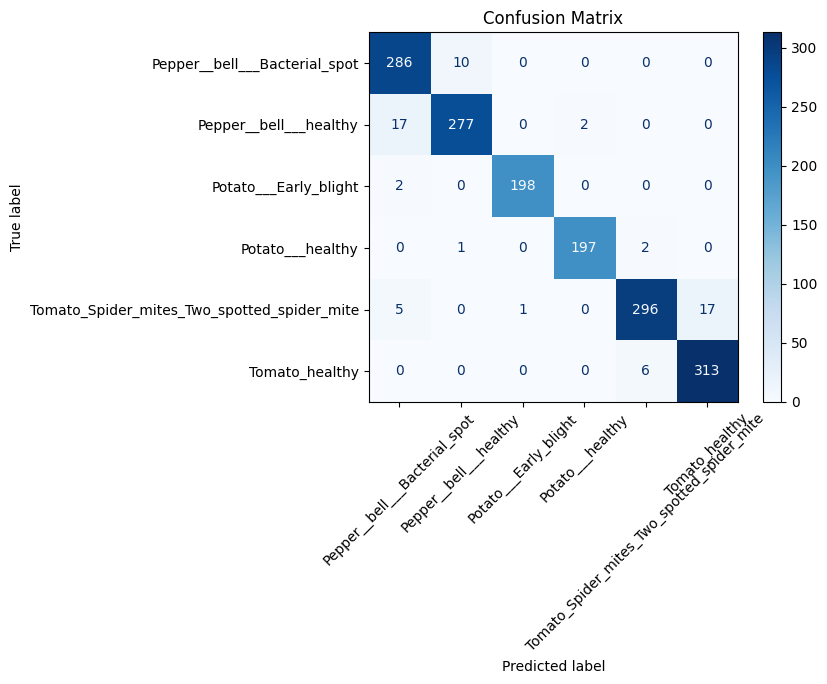

In [14]:
# Install required packages
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Define test directory
test_dir = '/content/drive/MyDrive/Final Model FYP/model/test'

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')

# Set image parameters
img_size = (224, 224)  # Update if your model used a different input size
batch_size = 32

# Load test data using ImageDataGenerator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for matching predictions with true labels
)

# Predict on test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot it
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [19]:
import tensorflow as tf
import tf2onnx
import onnx
import numpy as np

# Load and compile model
seq_model = tf.keras.models.load_model('/content/drive/MyDrive/Final Model FYP/multi_class_model.h5')
seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trigger metric initialization
dummy_input = np.ones((1, 224, 224, 3), dtype=np.float32)
dummy_label = np.zeros((1, 6), dtype=np.float32)
dummy_label[0, 0] = 1
seq_model.evaluate(dummy_input, dummy_label, verbose=0)

# Wrap in Functional API model with named output to avoid AttributeError
inputs = tf.keras.Input(shape=(224, 224, 3), name="input")
outputs = seq_model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="wrapped_model")

# Convert to ONNX
spec = (tf.TensorSpec((1, 224, 224, 3), tf.float32, name="input"),)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)

# Save ONNX model
onnx_save_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
onnx.save_model(onnx_model, onnx_save_path)

print(f"✅ ONNX model successfully saved to: {onnx_save_path}")


ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7c9f5dcbf100>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


✅ ONNX model successfully saved to: /content/drive/MyDrive/Final Model FYP/multi_class_model.onnx


In [21]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00


In [30]:
!ls "/content/drive/MyDrive"


'00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'
'0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG'
'Colab Notebooks'
 ddrty.jpeg
 down.jpeg
'download (10).jpeg'
 downloadpotato.jpeg
 downloadtomato.jpeg
 earlyblight.png
'Final Model FYP'
 images.jpeg
 ppttpp.jpeg
 rrtyui.JPG
 tomato.jpeg
 tomatospiDermites.jpeg
 yimage.png


In [31]:
image_path = "/content/drive/MyDrive/download (10).jpeg"
print(os.path.abspath(image_path))  # Prints the absolute path of the image


/content/drive/MyDrive/download (10).jpeg


In [32]:
import os

# Path to the image
image_path = "/content/drive/MyDrive/download (10).jpeg"
print("Absolute Image Path:", os.path.abspath(image_path))  # Prints the absolute path of the image


Absolute Image Path: /content/drive/MyDrive/download (10).jpeg


In [33]:
import cv2

# Load the image
img = cv2.imread(image_path)

# Check if the image is loaded
if img is None:
    print(f"Failed to load image at {image_path}. Please check the path and file format.")
else:
    print(f"Image loaded successfully with shape: {img.shape}")


Image loaded successfully with shape: (195, 259, 3)


In [34]:
import onnxruntime as ort
import numpy as np
import cv2

# --- Configuration ---
onnx_model_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
image_path = '/content/drive/MyDrive/download (10).jpeg'
class_names = ['pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-earlyblight', 'potato-healthy', 'tomato-spider-mites', 'tomato-healthy']

# --- Load ONNX model ---
session = ort.InferenceSession(onnx_model_path)

# Get input & output layer names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# --- Image Preprocessing Function ---
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    # Resize to model input size (224x224)
    img = cv2.resize(img, (224, 224))

    # Convert to RGB (OpenCV loads in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize to [0, 1]
    img = img.astype(np.float32) / 255.0

    # Add batch dimension (for single image input)
    img = np.expand_dims(img, axis=0)

    return img

# --- Load and preprocess image ---
input_tensor = preprocess_image(image_path)

# --- Run inference ---
output = session.run([output_name], {input_name: input_tensor})
predicted_index = np.argmax(output[0])
confidence = np.max(output[0])

# --- Print result ---
print("Predicted class index:", predicted_index)
print("Confidence:", confidence)
if class_names:
    print("Predicted class label:", class_names[predicted_index])


Predicted class index: 4
Confidence: 0.44605848
Predicted class label: tomato-spider-mites


In [36]:
import onnxruntime as ort
import numpy as np
import cv2
import os

# --- Configuration ---
onnx_model_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
image_path = '/content/drive/MyDrive/earlyblight.png'  # Make sure this path is correct
class_names = ['pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-earlyblight', 'potato-healthy', 'tomato-spider-mites', 'tomato-healthy']

# Check if image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    # --- Load ONNX model ---
    session = ort.InferenceSession(onnx_model_path)

    # Get input & output layer names
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # --- Image Preprocessing Function ---
    def preprocess_image(image_path):
        img = cv2.imread(image_path)

        if img is None:
            print("Error: Failed to load image.")
            return None

        # Resize to model input size (224x224)
        img = cv2.resize(img, (224, 224))

        # Convert to RGB (OpenCV loads in BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize to [0, 1]
        img = img.astype(np.float32) / 255.0

        # Add batch dimension (for single image input)
        img = np.expand_dims(img, axis=0)

        return img

    # --- Load and preprocess image ---
    input_tensor = preprocess_image(image_path)

    if input_tensor is not None:
        # --- Run inference ---
        output = session.run([output_name], {input_name: input_tensor})
        predicted_index = np.argmax(output[0])
        confidence = np.max(output[0])

        # --- Print result ---
        print("Predicted class index:", predicted_index)
        print("Confidence:", confidence)
        if class_names:
            print("Predicted class label:", class_names[predicted_index])


Predicted class index: 2
Confidence: 0.99974173
Predicted class label: potato-earlyblight


In [37]:
import onnxruntime as ort
import numpy as np
import cv2
import os

# --- Configuration ---
onnx_model_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
image_path = '/content/drive/MyDrive/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'  # Make sure this path is correct
class_names = ['pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-earlyblight', 'potato-healthy', 'tomato-spider-mites', 'tomato-healthy']

# Check if image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    # --- Load ONNX model ---
    session = ort.InferenceSession(onnx_model_path)

    # Get input & output layer names
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # --- Image Preprocessing Function ---
    def preprocess_image(image_path):
        img = cv2.imread(image_path)

        if img is None:
            print("Error: Failed to load image.")
            return None

        # Resize to model input size (224x224)
        img = cv2.resize(img, (224, 224))

        # Convert to RGB (OpenCV loads in BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize to [0, 1]
        img = img.astype(np.float32) / 255.0

        # Add batch dimension (for single image input)
        img = np.expand_dims(img, axis=0)

        return img

    # --- Load and preprocess image ---
    input_tensor = preprocess_image(image_path)

    if input_tensor is not None:
        # --- Run inference ---
        output = session.run([output_name], {input_name: input_tensor})
        predicted_index = np.argmax(output[0])
        confidence = np.max(output[0])

        # --- Print result ---
        print("Predicted class index:", predicted_index)
        print("Confidence:", confidence)
        if class_names:
            print("Predicted class label:", class_names[predicted_index])



Predicted class index: 0
Confidence: 0.95711976
Predicted class label: pepper-bell-bacterial-spot


In [59]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [41]:
import os
print(os.path.exists('/content/drive/Mydrive/downloadtomato.jpeg'))  # Should print True if the file exists


False


In [42]:
import onnxruntime as ort
import numpy as np
import cv2
import os

# --- Configuration ---
onnx_model_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
image_path = '/content/drive/MyDrive/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'  # Make sure this path is correct
class_names = ['pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-earlyblight', 'potato-healthy', 'tomato-spider-mites', 'tomato-healthy']

# Check if image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    # --- Load ONNX model ---
    session = ort.InferenceSession(onnx_model_path)

    # Get input & output layer names
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # --- Image Preprocessing Function ---
    def preprocess_image(image_path):
        img = cv2.imread(image_path)

        if img is None:
            print("Error: Failed to load image.")
            return None

        # Resize to model input size (224x224)
        img = cv2.resize(img, (224, 224))

        # Convert to RGB (OpenCV loads in BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize to [0, 1]
        img = img.astype(np.float32) / 255.0

        # Add batch dimension (for single image input)
        img = np.expand_dims(img, axis=0)

        return img

    # --- Load and preprocess image ---
    input_tensor = preprocess_image(image_path)

    if input_tensor is not None:
        # --- Run inference ---
        output = session.run([output_name], {input_name: input_tensor})
        predicted_index = np.argmax(output[0])
        confidence = np.max(output[0])

        # --- Print result ---
        print("Predicted class index:", predicted_index)
        print("Confidence:", confidence)
        if class_names:
            print("Predicted class label:", class_names[predicted_index])



Predicted class index: 0
Confidence: 0.95711976
Predicted class label: pepper-bell-bacterial-spot


In [60]:
import onnxruntime as ort
import numpy as np
import cv2
import os

# --- Configuration ---
onnx_model_path = '/content/drive/MyDrive/Final Model FYP/multi_class_model.onnx'
image_path = '/content/drive/MyDrive/1c4ea24a-8e30-4fde-8ff3-32c9bbe4b432___Com.G_SpM_FL 1448.JPG'  # Make sure this path is correct
class_names = ['pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-earlyblight', 'potato-healthy', 'tomato-spider-mites', 'tomato-healthy']

# Check if image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    # --- Load ONNX model ---
    session = ort.InferenceSession(onnx_model_path)

    # Get input & output layer names
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # --- Image Preprocessing Function ---
    def preprocess_image(image_path):
        img = cv2.imread(image_path)

        if img is None:
            print("Error: Failed to load image.")
            return None

        # Resize to model input size (224x224)
        img = cv2.resize(img, (224, 224))

        # Convert to RGB (OpenCV loads in BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize to [0, 1]
        img = img.astype(np.float32) / 255.0

        # Add batch dimension (for single image input)
        img = np.expand_dims(img, axis=0)

        return img

    # --- Load and preprocess image ---
    input_tensor = preprocess_image(image_path)

    if input_tensor is not None:
        # --- Run inference ---
        output = session.run([output_name], {input_name: input_tensor})
        predicted_index = np.argmax(output[0])
        confidence = np.max(output[0])

        # --- Print result ---
        print("Predicted class index:", predicted_index)
        print("Confidence:", confidence)
        if class_names:
            print("Predicted class label:", class_names[predicted_index])



Predicted class index: 4
Confidence: 0.9814353
Predicted class label: tomato-spider-mites
